# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [11]:
import pandas as pd
from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
import matplotlib.pyplot as plt

In [29]:
bryant = pd.read_csv("data/Bryant et al 2010.csv")
# find different output values
bryant["Greater than 90%"].value_counts()

0    793
1     89
Name: Greater than 90%, dtype: int64

In [7]:
x = bryant.iloc[:, 2:11]
y = bryant.iloc[:, 15]
y = y.values

In [30]:
# Peel is set to 0.1, which mimics the results of the paper best
# threshold is the same for all values >0 en <1 because all values are either 0 or 1
prim_alg = prim.Prim(x, y, threshold=0.1, peel_alpha=0.1)
box1 = prim_alg.find_box()

[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.05102040816326531, coverage: 0.5056179775280899, density: 1.0 restricted_dimensions: 6


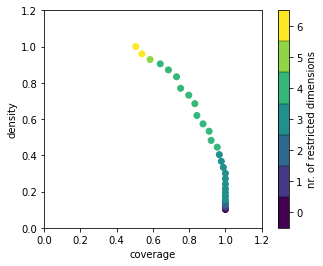

In [31]:
box1.show_tradeoff()
plt.show()

coverage    0.752809
density     0.770115
id                21
mass        0.098639
mean        0.770115
res_dim            4
Name: 21, dtype: object

                            box 21                                            
                               min         max                       qp values
Total biomass           450.000000  755.799988   [-1.0, 4.716968553178765e-06]
Demand elasticity        -0.422000   -0.202000  [1.1849299115762218e-16, -1.0]
Biomass backstop price  150.049995  199.600006   [3.515112530263049e-11, -1.0]
Cellulosic cost          72.650002  133.699997     [0.15741333528927348, -1.0]



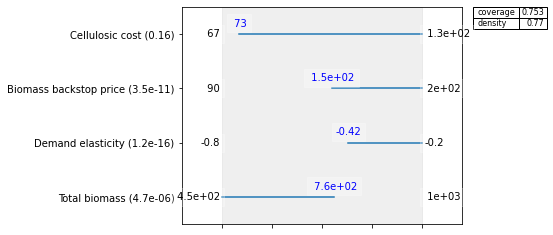

In [32]:
box1.inspect(21)
box1.inspect(21, style='graph')
plt.show()

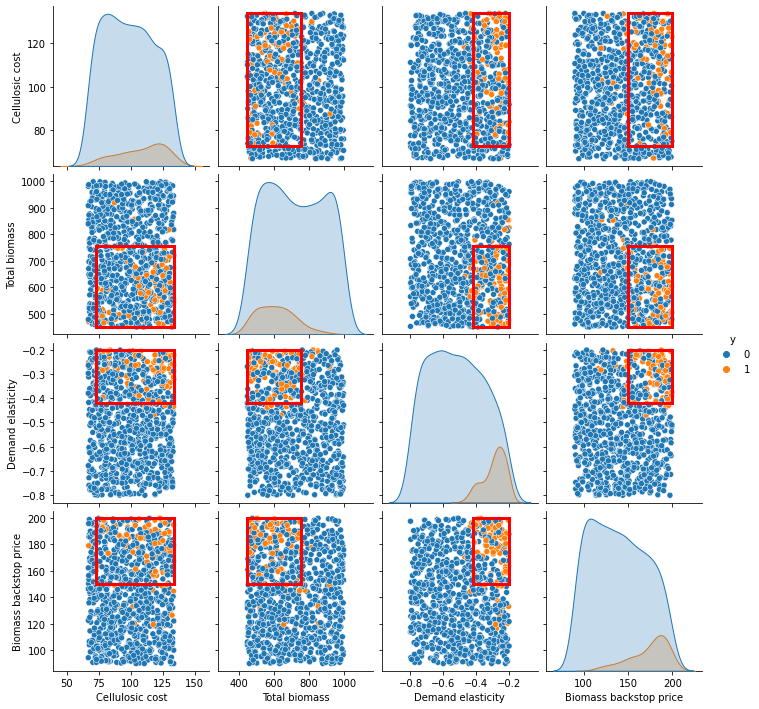

In [34]:
box1.select(21)
fig = box1.show_pairs_scatter()
plt.show()

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


In [ ]:
rozenberg = pd.read_csv("data/Rozenberg et al 2014.csv")

In [6]:
rozenberg.head()

,inequalities,convergence,population,behaviors,technologies,fossils,capital markets,SSP1,SSP2,SSP3,SSP4,SSP5
0,0,2,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,1,0,0,0,0,0
2,0,2,0,0,0,1,0,0,0,0,0,0
3,0,2,0,0,0,1,1,0,0,0,0,0
4,0,2,0,0,1,0,0,0,1,0,0,0


# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [37]:
from ema_workbench.util.utilities import load_results

In [39]:
hamarat = load_results('data/Hamarat et al 2013.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\Eigenaar\Documents\GitHub\EPA1361\lab_sessions\Week 3-4 - vulnerability analysis\data\Hamarat et al 2013.gz


In [45]:
experiments = hamarat[0]
outcomes = hamarat[1]

In [47]:
data = outcomes['fraction renewables']
# y = data[0,:] < data[-1, :]
r1 = outcomes[y1] < t1
r2 = outcomes[y2] > t2
r3 = outocmes[y3] < t3
rc = r1 or (r2 or r3)

NameError: name 'y1' is not defined